## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import seaborn as sns # 另一個繪圖-樣式套件
import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [3]:
app_train['AMT_INCOME_TOTAL_CUT'] = pd.qcut(app_train['AMT_INCOME_TOTAL'], 10)
app_train['AMT_INCOME_TOTAL_CUT'].head(20)

0        (180000.0, 225000.0]
1        (225000.0, 270000.0]
2        (25649.999, 81000.0]
3        (112500.0, 135000.0]
4        (112500.0, 135000.0]
5          (81000.0, 99000.0]
6        (162000.0, 180000.0]
7     (270000.0, 117000000.0]
8         (99000.0, 112500.0]
9        (112500.0, 135000.0]
10        (99000.0, 112500.0]
11       (25649.999, 81000.0]
12       (25649.999, 81000.0]
13       (180000.0, 225000.0]
14       (180000.0, 225000.0]
15       (147150.0, 162000.0]
16        (99000.0, 112500.0]
17       (25649.999, 81000.0]
18        (99000.0, 112500.0]
19         (81000.0, 99000.0]
Name: AMT_INCOME_TOTAL_CUT, dtype: category
Categories (10, interval[float64]): [(25649.999, 81000.0] < (81000.0, 99000.0] < (99000.0, 112500.0] < (112500.0, 135000.0] ... (162000.0, 180000.0] < (180000.0, 225000.0] < (225000.0, 270000.0] < (270000.0, 117000000.0]]

D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


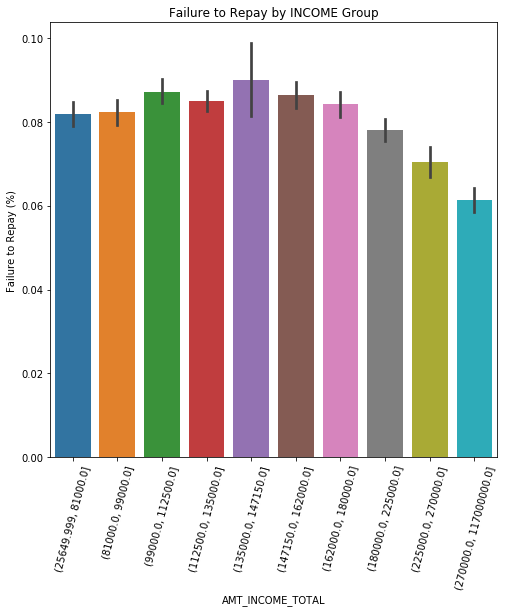

In [4]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = app_train['AMT_INCOME_TOTAL_CUT']
py = app_train['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('AMT_INCOME_TOTAL'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by INCOME Group');